## Plot Genotype Quality

In [1]:
library(ggplot2)
read.counts <- function(fname,variant) {
    dat <- read.table(fname,as.is=TRUE,col.names=c('count','gt','gq'),na.strings='.')
    denominator <- with(dat,tapply(count,gt,sum))
    dat$frequency <- with(dat,count/denominator[gt])
    dat$variant <- variant
    dat
}

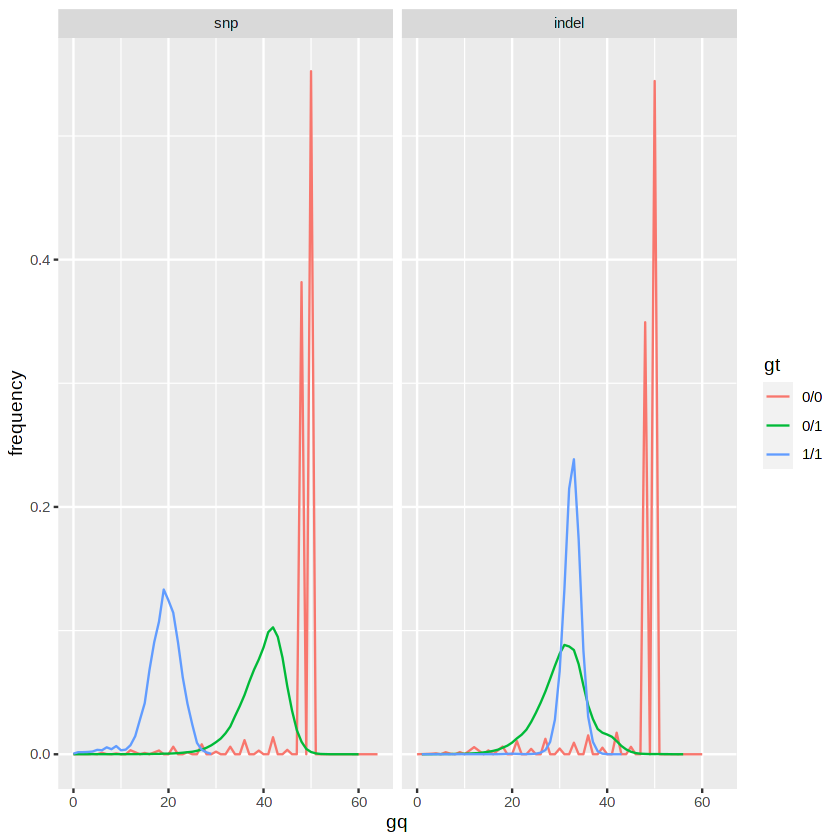

In [3]:
dat <- rbind(read.counts('~/test/bcftools/snp.counts.txt','snp'),read.counts('~/test/bcftools/indel.counts.txt','indel'))
dat$variant <- factor(dat$variant,levels=c('snp','indel'))
ggplot(subset(dat,gt%in%c('0/0','0/1','1/1')),aes(x=gq,y=frequency,col=gt))  + geom_line()+facet_wrap(~variant)
ggsave("ukbb-gq.png",width=8,height=4)

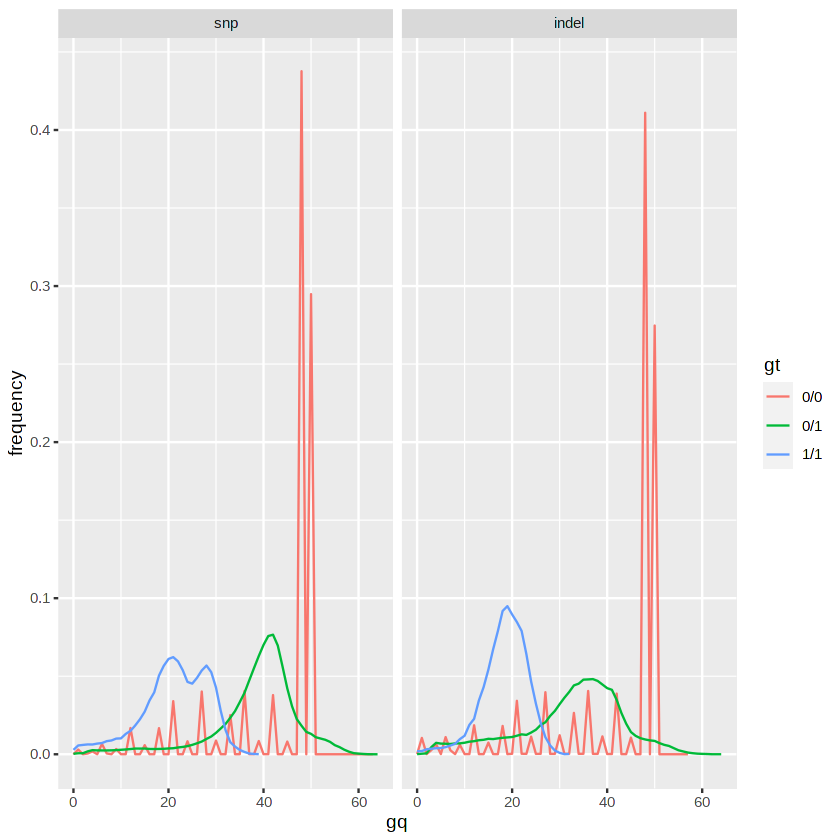

In [2]:
dat <- rbind(read.counts('~/test/bcftools/snp.counts.22.txt','snp'),read.counts('~/test/bcftools/indel.counts.22.txt','indel'))
dat$variant <- factor(dat$variant,levels=c('snp','indel'))
ggplot(subset(dat,gt%in%c('0/0','0/1','1/1')),aes(x=gq,y=frequency,col=gt))  + geom_line()+facet_wrap(~variant)
ggsave("ukbb-gq.22.png",width=8,height=4)